In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("/kaggle/input/uae-cancer-patient-dataset/_cancer_dataset_uae.csv")
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


**DATA PREPROCESSING**

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [75]:
#Checking for missing values
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [76]:
df = df.drop(["Death_Date","Cause_of_Death", "Comorbidities", "Diagnosis_Date",
             "Patient_ID","Hospital","Primary_Physician","Ethnicity",
             "Treatment_Start_Date"], axis=1)
df.head()

,Age,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Weight,Height
0,69,Female,Emirati,Umm Al Quwain,Liver,II,Radiation,Recovered,Non-Smoker,61,157
1,32,Male,Emirati,Umm Al Quwain,Leukemia,III,Surgery,Recovered,Smoker,80,175
2,89,Male,Emirati,Abu Dhabi,Liver,III,Radiation,Under Treatment,Non-Smoker,50,175
3,78,Female,Emirati,Abu Dhabi,Lung,III,Radiation,Recovered,Former Smoker,44,155
4,38,Female,Emirati,Fujairah,Pancreatic,II,Chemotherapy,Recovered,Former Smoker,101,160


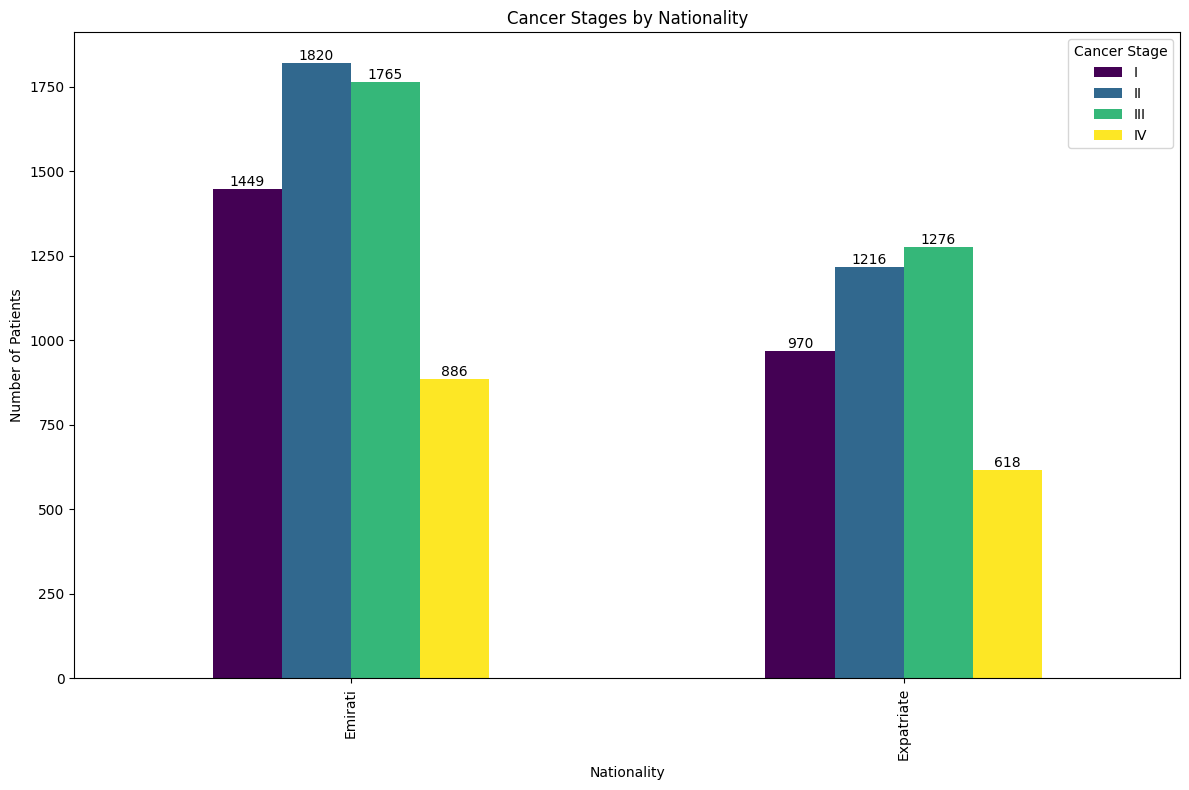

In [77]:
# Count cancer stages grouped by Nationality
stage_counts = df.groupby(['Nationality', 'Cancer_Stage']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer Stages by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Stage')
plt.tight_layout()
plt.show()

**Observations:**
Based on the chart output, Emirati patients recorded the highest number of Stage IV cases (886), with 1,449 patients at Stage I. On the other hand, Expatriate patients showed a reduced count across all stages, with only 618 patients at Stage IV.

<Figure size 2000x2000 with 0 Axes>

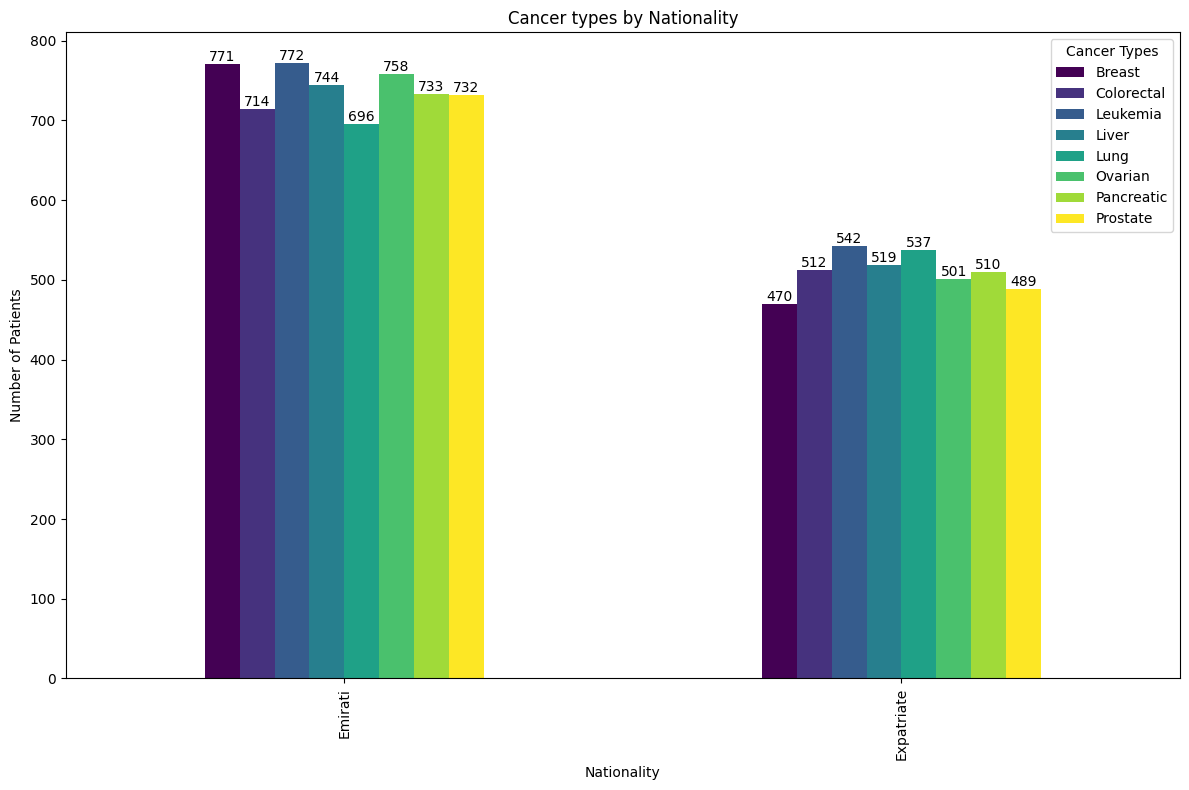

In [78]:
# Count cancer stages grouped by Nationality
stage_counts = df.groupby(['Nationality', 'Cancer_Type']).size().unstack().fillna(0)

# Plotting as grouped bars
plt.figure(figsize=(20, 20))
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer types by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Types')
plt.tight_layout()
plt.show()

**Observation 2:**
Similarly, across the various cancer types by nationality, the results show higher recorded cases among Emirati citizens across all types. This indicates an urgent need for targeted interventions and strategic approaches to address the challenge effectively.

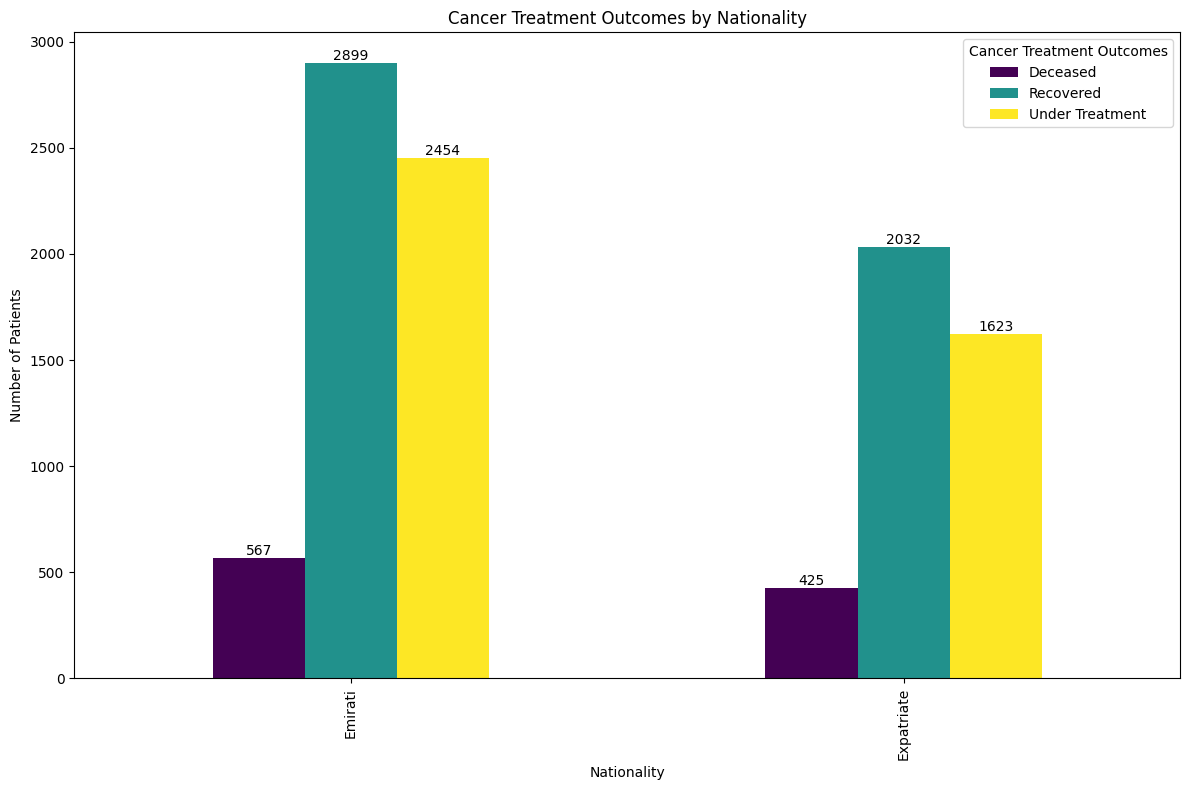

In [79]:
# Count cancer stages grouped by Nationality
stage_counts = df.groupby(['Nationality', 'Outcome']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer Treatment Outcomes by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Treatment Outcomes')
plt.tight_layout()
plt.show()

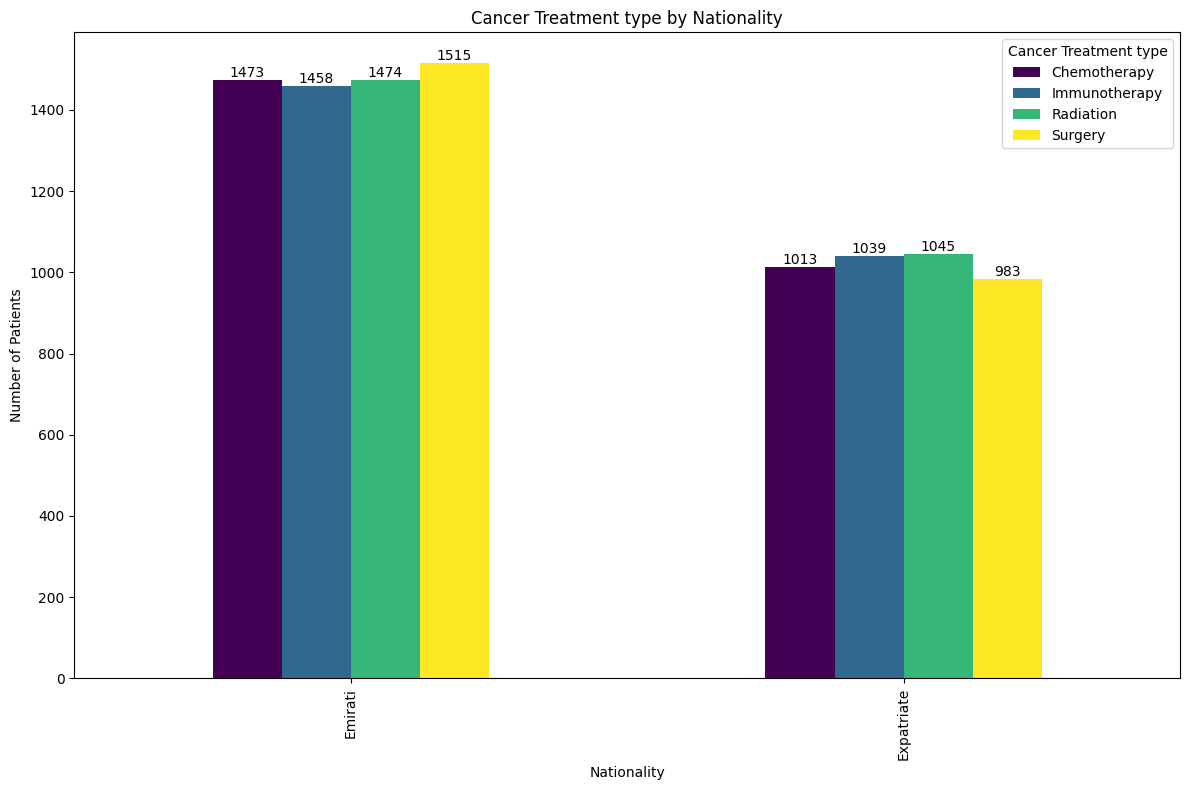

In [80]:
# Count cancer stages grouped by Nationality
stage_counts = df.groupby(['Nationality', 'Treatment_Type']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer Treatment type by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Treatment type')
plt.tight_layout()
plt.show()

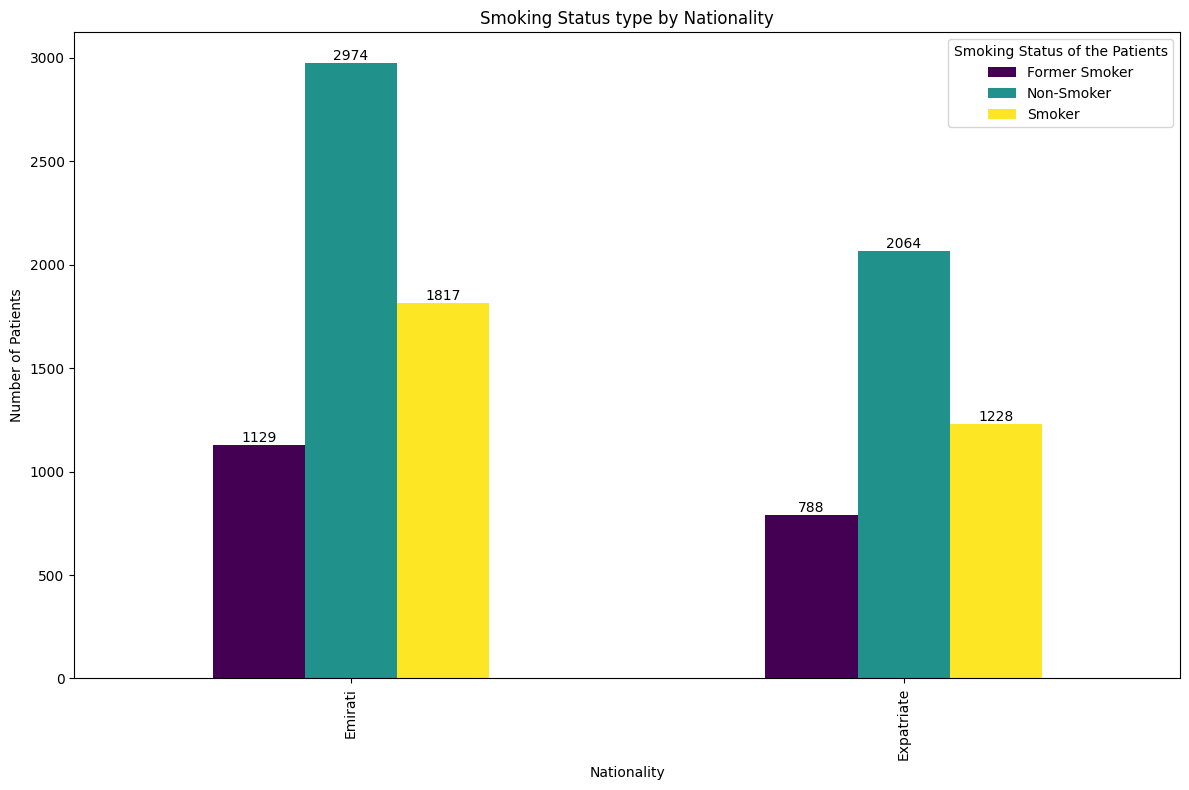

In [81]:
# Count cancer stages grouped by Nationality
stage_counts = df.groupby(['Nationality', 'Smoking_Status']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Smoking Status type by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Patients')
plt.legend(title='Smoking Status of the Patients')
plt.tight_layout()
plt.show()

*ANALYZING THE FACTORS BY ACROSS THE DIFFERENT EMIRATE*

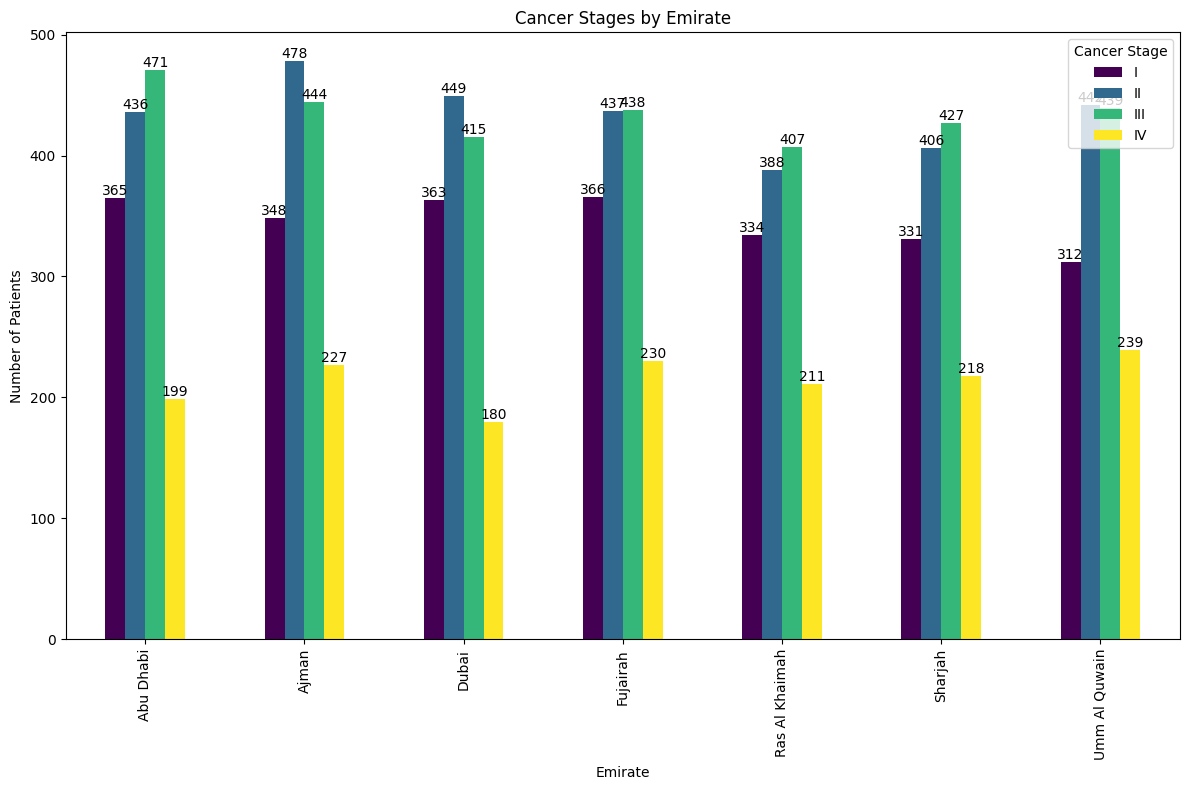

In [82]:
# Count cancer stages grouped by Emirate
stage_counts = df.groupby(['Emirate', 'Cancer_Stage']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer Stages by Emirate')
plt.xlabel('Emirate')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Stage')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

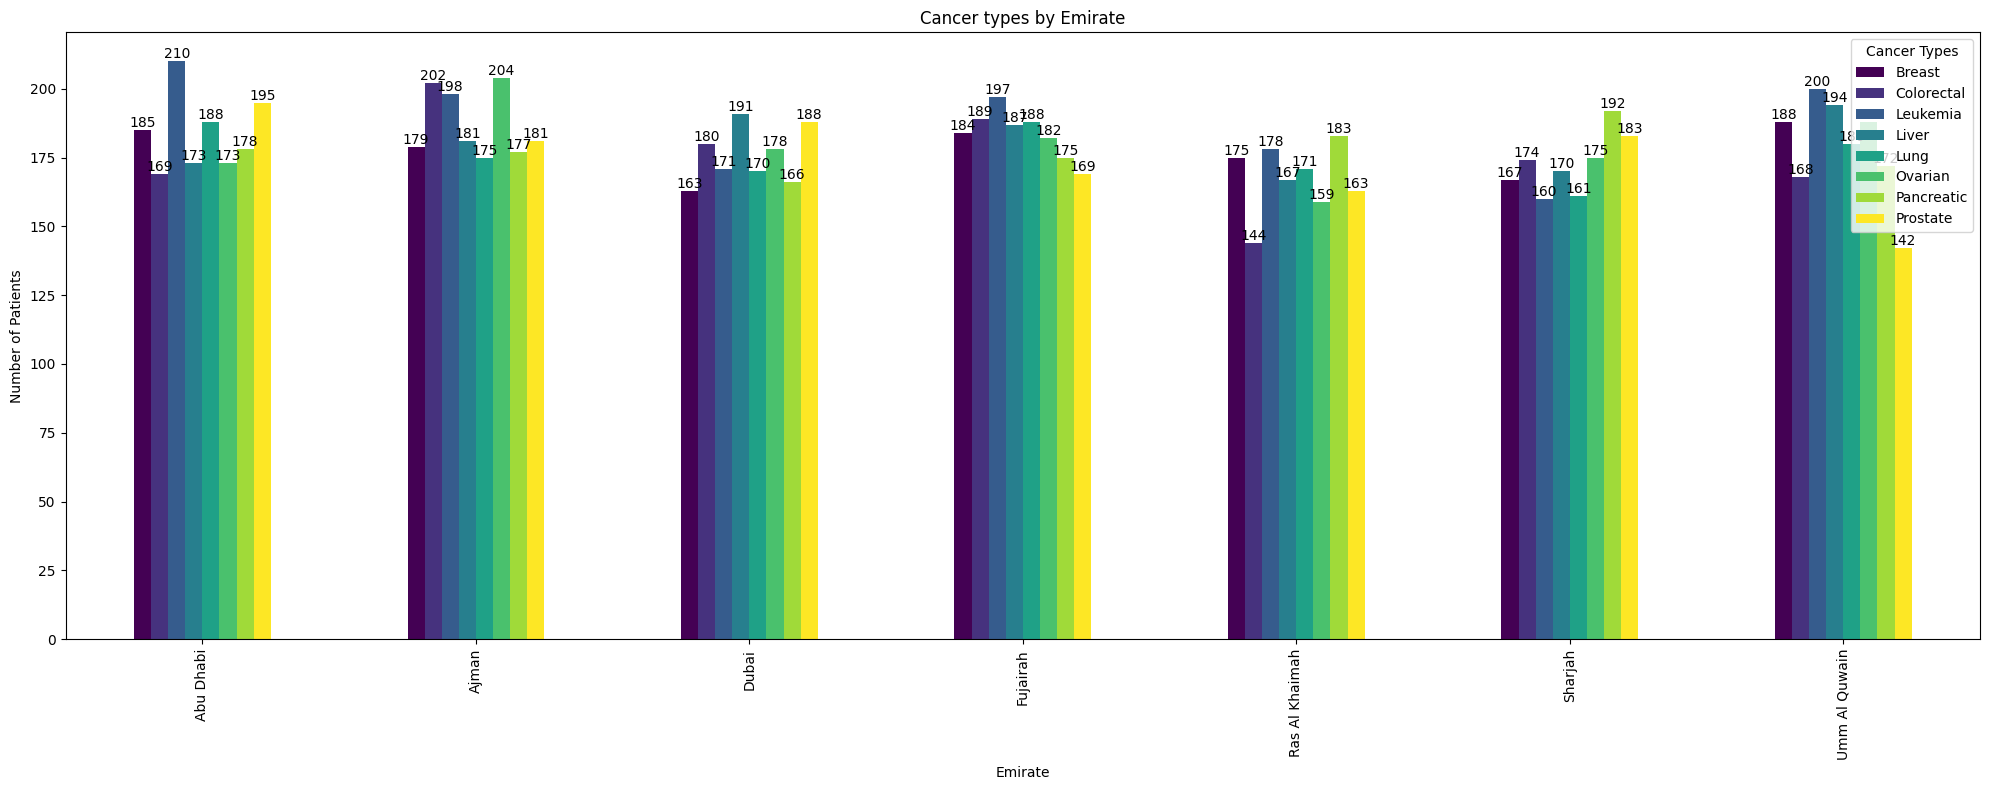

In [83]:
# Count cancer stages grouped by Emirate
stage_counts = df.groupby(['Emirate', 'Cancer_Type']).size().unstack().fillna(0)

# Plotting as grouped bars
plt.figure(figsize=(20, 20))
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(20, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer types by Emirate')
plt.xlabel('Emirate')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Types')
plt.tight_layout()
plt.show()

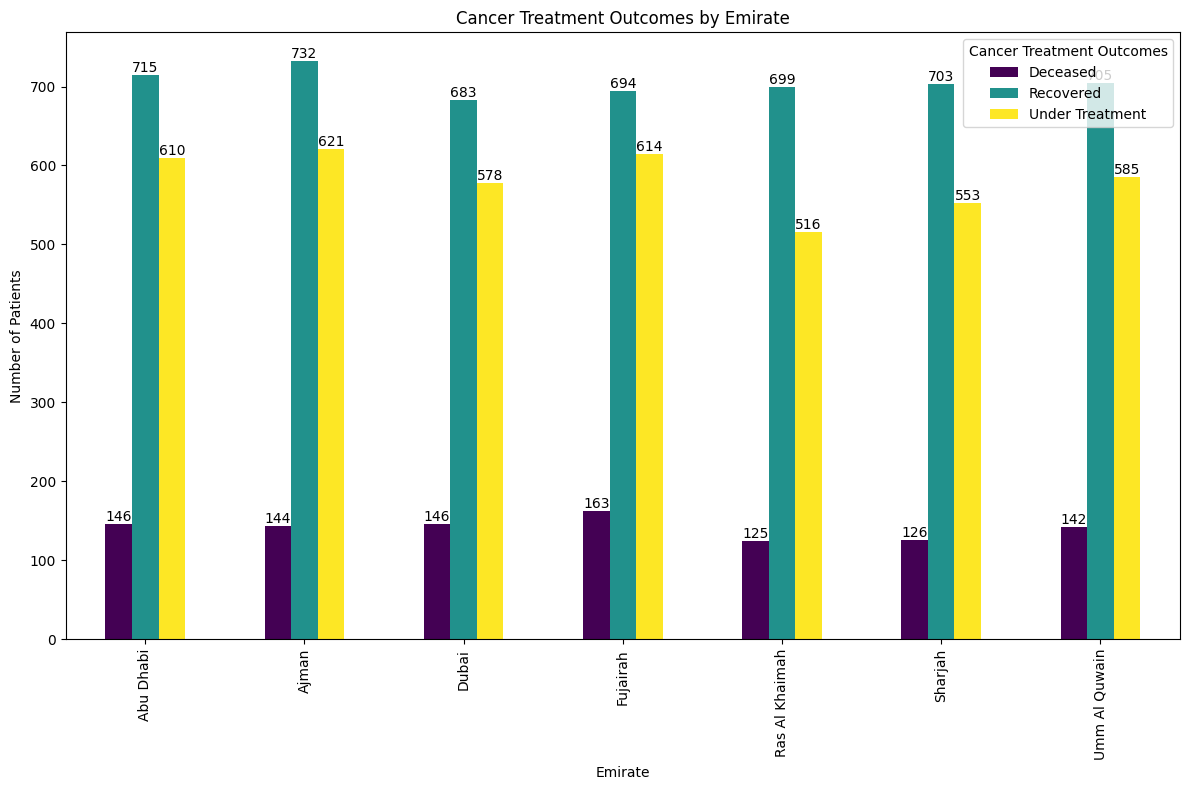

In [84]:
# Count cancer stages grouped by Emirate
stage_counts = df.groupby(['Emirate', 'Outcome']).size().unstack().fillna(0)

# Plotting as grouped bars
ax = stage_counts.plot(kind='bar', colormap='viridis', figsize=(12, 8))
# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Cancer Treatment Outcomes by Emirate')
plt.xlabel('Emirate')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Treatment Outcomes')
plt.tight_layout()
plt.show()

**Observation:**
Ajman recorded the highest number of recovered patients at 732, with 621 still under treatment and 144 deceased. Abu Dhabi and Dubai reported the highest number of deaths, each with 146 deceased patients. Sharjah had the lowest number of deaths at 126, along with 703 recoveries and 553 patients still under treatment.

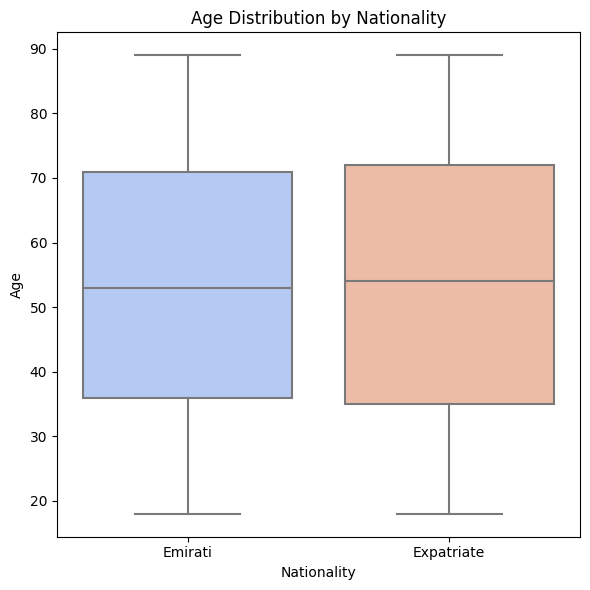

In [85]:
# Box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='Nationality', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

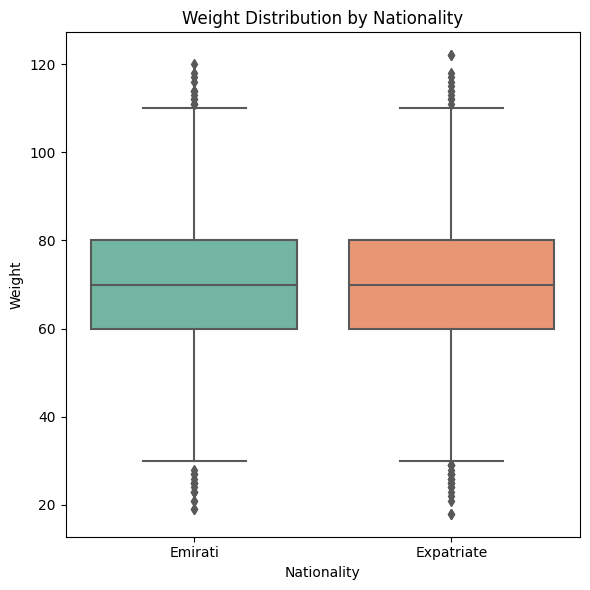

In [86]:
# Box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='Nationality', y='Weight', data=df, palette='Set2')
plt.title('Weight Distribution by Nationality')
plt.ylabel('Weight')
plt.xlabel('Nationality')
plt.tight_layout()
plt.show()

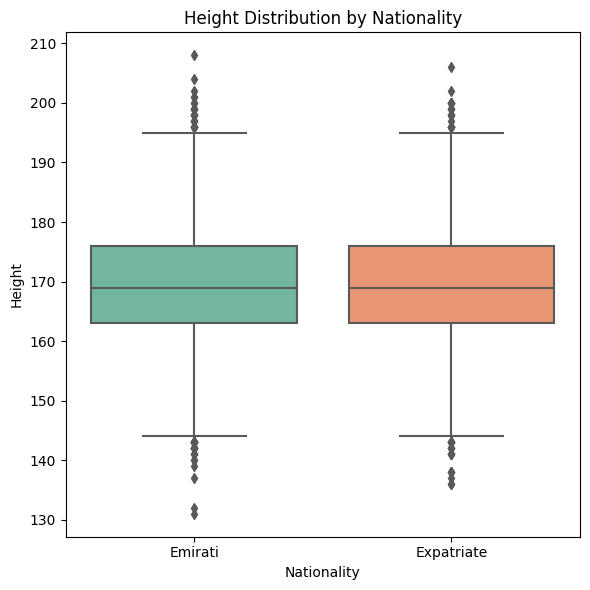

In [87]:
# Box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='Nationality', y='Height', data=df, palette='Set2')
plt.title('Height Distribution by Nationality')
plt.ylabel('Height')
plt.xlabel('Nationality')
plt.tight_layout()
plt.show()

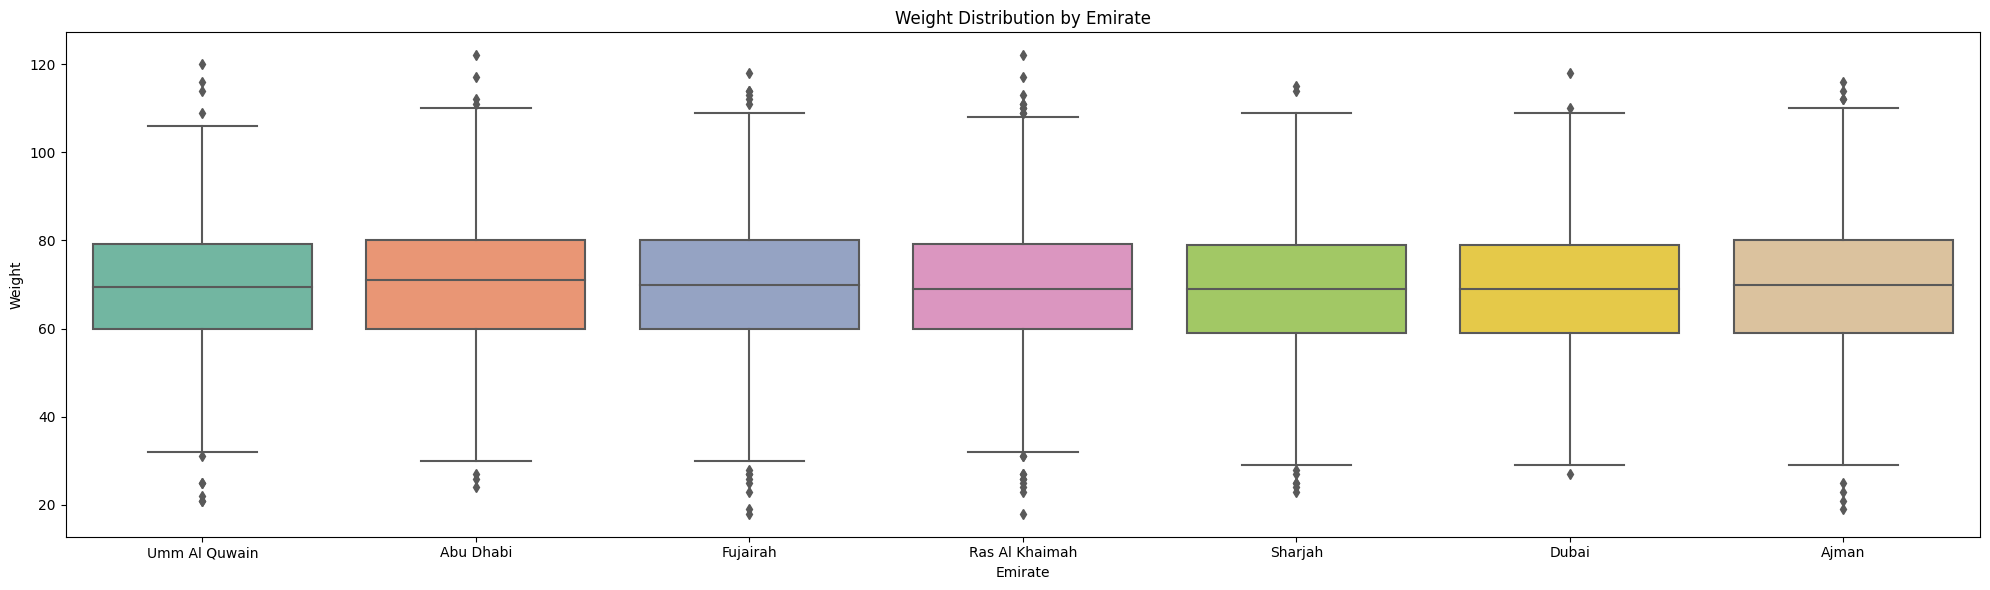

In [88]:
# Box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x='Emirate', y='Weight', data=df, palette='Set2')
plt.title('Weight Distribution by Emirate')
plt.ylabel('Weight')
plt.xlabel('Emirate')
plt.tight_layout()
plt.show()

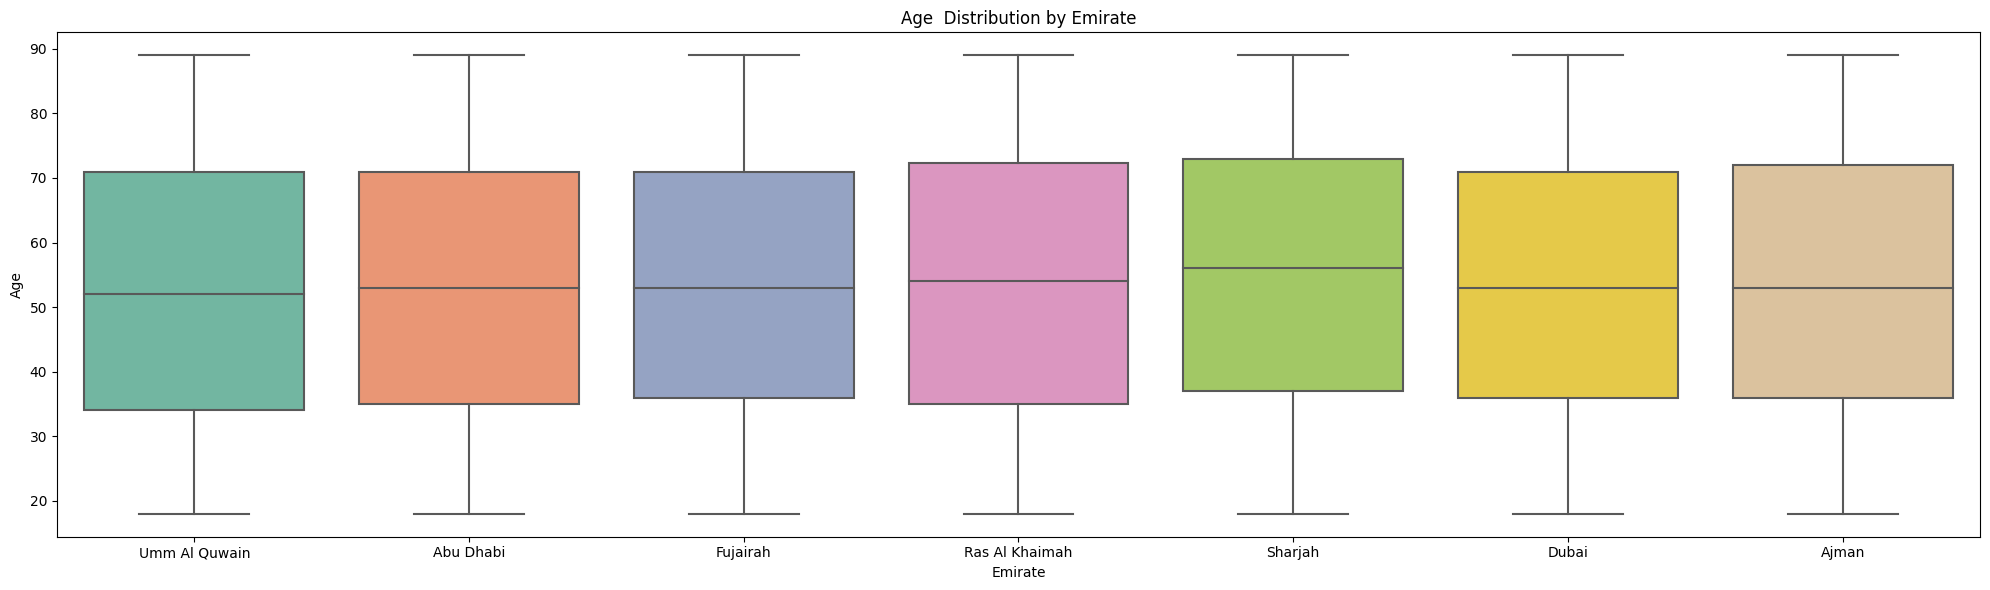

In [89]:
# Box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x='Emirate', y='Age', data=df, palette='Set2')
plt.title('Age  Distribution by Emirate')
plt.ylabel('Age')
plt.xlabel('Emirate')
plt.tight_layout()
plt.show()

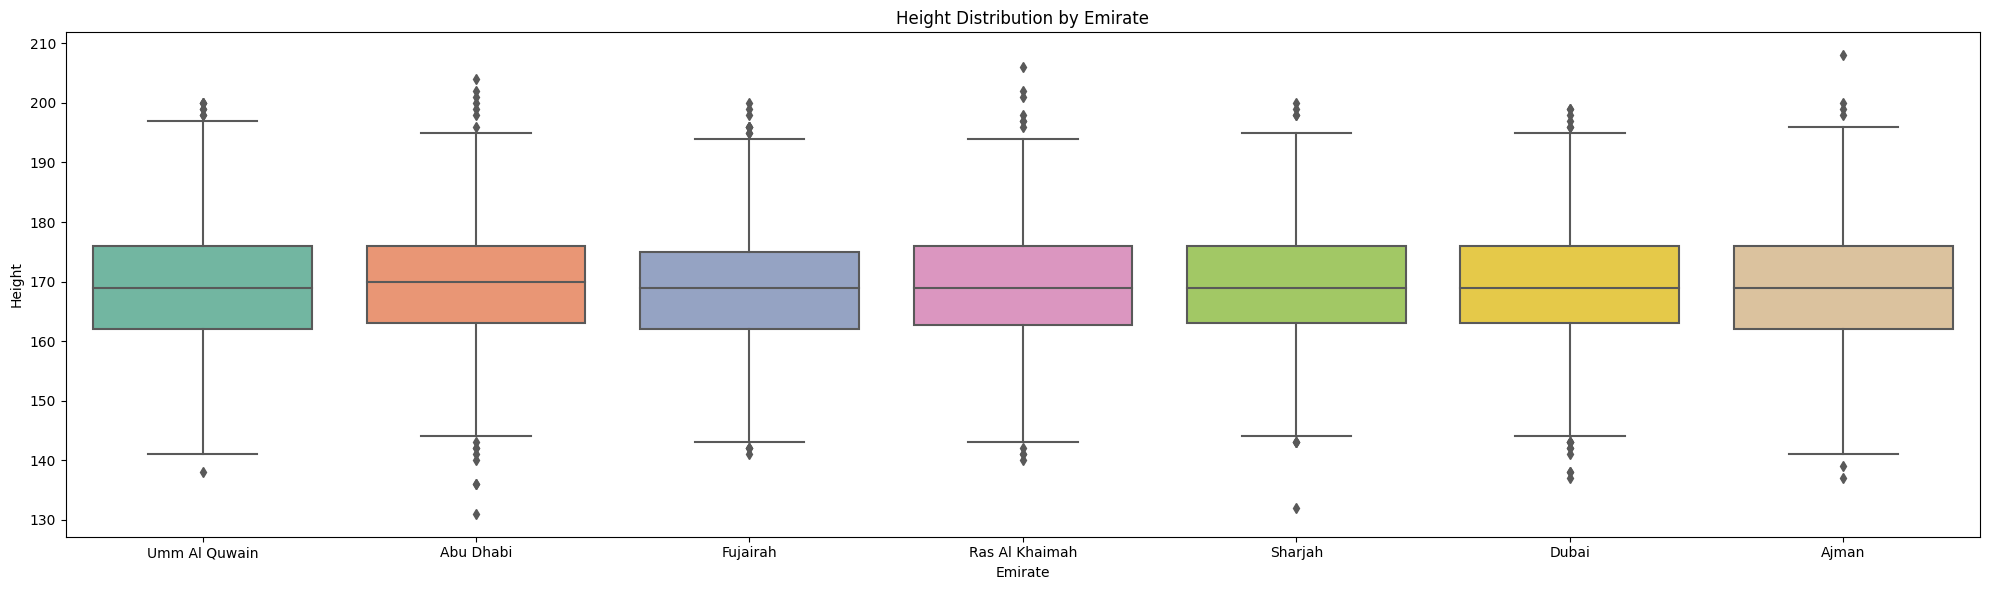

In [90]:
# Box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x='Emirate', y='Height', data=df, palette='Set2')
plt.title('Height Distribution by Emirate')
plt.ylabel('Height')
plt.xlabel('Emirate')
plt.tight_layout()
plt.show()

In [91]:
df_clean = df.drop(["Nationality","Emirate"], axis=1)
df_clean.head()

,Age,Gender,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Weight,Height
0,69,Female,Liver,II,Radiation,Recovered,Non-Smoker,61,157
1,32,Male,Leukemia,III,Surgery,Recovered,Smoker,80,175
2,89,Male,Liver,III,Radiation,Under Treatment,Non-Smoker,50,175
3,78,Female,Lung,III,Radiation,Recovered,Former Smoker,44,155
4,38,Female,Pancreatic,II,Chemotherapy,Recovered,Former Smoker,101,160


In [92]:
df_clean["Outcome"].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

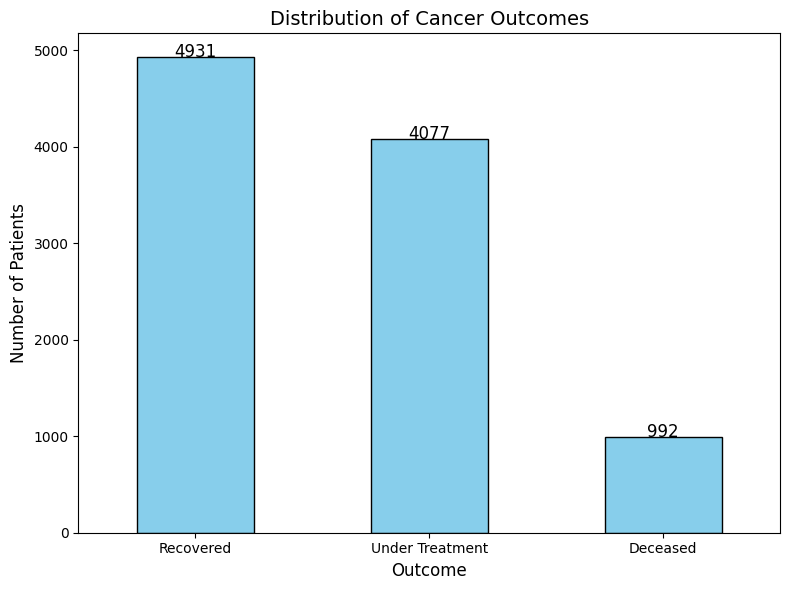

In [93]:
# Assuming df_clean is already defined and cleaned
outcome_counts = df_clean["Outcome"].value_counts()
# Plotting
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add value labels on top of bars
for index, value in enumerate(outcome_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=12)
# Titles and labels
plt.title('Distribution of Cancer Outcomes', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:**

The target class distribution reveals evidence of data imbalance, which will be addressed using the SMOTE (Synthetic Minority Over-sampling Technique) method.

In [94]:
df_clean["Cancer_Type"].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [95]:
df_clean["Cancer_Stage"].value_counts()

Cancer_Stage
III    3041
II     3036
I      2419
IV     1504
Name: count, dtype: int64

In [96]:
df_clean["Treatment_Type"].value_counts()

Treatment_Type
Radiation        2519
Surgery          2498
Immunotherapy    2497
Chemotherapy     2486
Name: count, dtype: int64

In [97]:
df_clean["Smoking_Status"].value_counts()

Smoking_Status
Non-Smoker       5038
Smoker           3045
Former Smoker    1917
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [99]:
# Initialize label encoder
label_encoder = LabelEncoder()
df_clean['Cancer_Type_Encoded'] = label_encoder.fit_transform(df_clean['Cancer_Type'])
df_clean['Smoking_Status_Encoded'] = label_encoder.fit_transform(df_clean['Smoking_Status'])
df_clean['Treatment_Type_Encoded'] = label_encoder.fit_transform(df_clean['Treatment_Type'])
df_clean['Cancer_Stage_Encoded'] = label_encoder.fit_transform(df_clean['Cancer_Stage'])
df_clean['Outcome_Encoded'] = label_encoder.fit_transform(df_clean['Outcome'])
df_clean['Gender_Encoded'] = label_encoder.fit_transform(df_clean['Gender'])
df_clean = df_clean.drop(['Cancer_Type','Smoking_Status',
              'Treatment_Type','Cancer_Stage',
                         'Outcome','Gender'], axis=1)
df_clean.head()

,Age,Weight,Height,Cancer_Type_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded,Cancer_Stage_Encoded,Outcome_Encoded,Gender_Encoded
0,69,61,157,3,1,2,1,1,0
1,32,80,175,2,2,3,2,1,1
2,89,50,175,3,1,2,2,2,1
3,78,44,155,4,0,2,2,1,0
4,38,101,160,6,0,0,1,1,0


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

In [130]:
# Features and labels
X = df_clean.drop('Outcome_Encoded', axis=1)
y = df_clean['Outcome_Encoded']
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
df_clean['Outcome_Encoded'].value_counts()

Outcome_Encoded
1    4931
2    4077
0     992
Name: count, dtype: int64

In [128]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline

**XBOOST**

In [131]:
# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Define XGBoost model
xgb_clf = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
# Define Pipeline with SMOTE and XGBoost
xgb_pipeline = Pipeline([
    ('smote', smote),  # Apply SMOTE first
    ('xgb', xgb_clf)   # Train XGBoost on resampled data
])
# Define hyperparameter grid
param_grid = {
    'xgb__n_estimators': [100, 150, 200, 250],
    'xgb__max_depth': [3, 5, 8, 10, 15],
    'xgb__learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
# Perform Grid Search with 10-fold Cross-Validation
grid_search = GridSearchCV(xgb_pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importa...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'xgb__max_depth': [3, 5, 8, 10, 15],
                         'xgb__n_estimators': [100, 150, 200, 250]},
             scoring='accuracy', verbose=2)

In [132]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 15, 'xgb__n_estimators': 250}


In [133]:
# Evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Test Accuracy of the XGBOOST model:", accuracy)

Test Accuracy of the XGBOOST model: 0.395


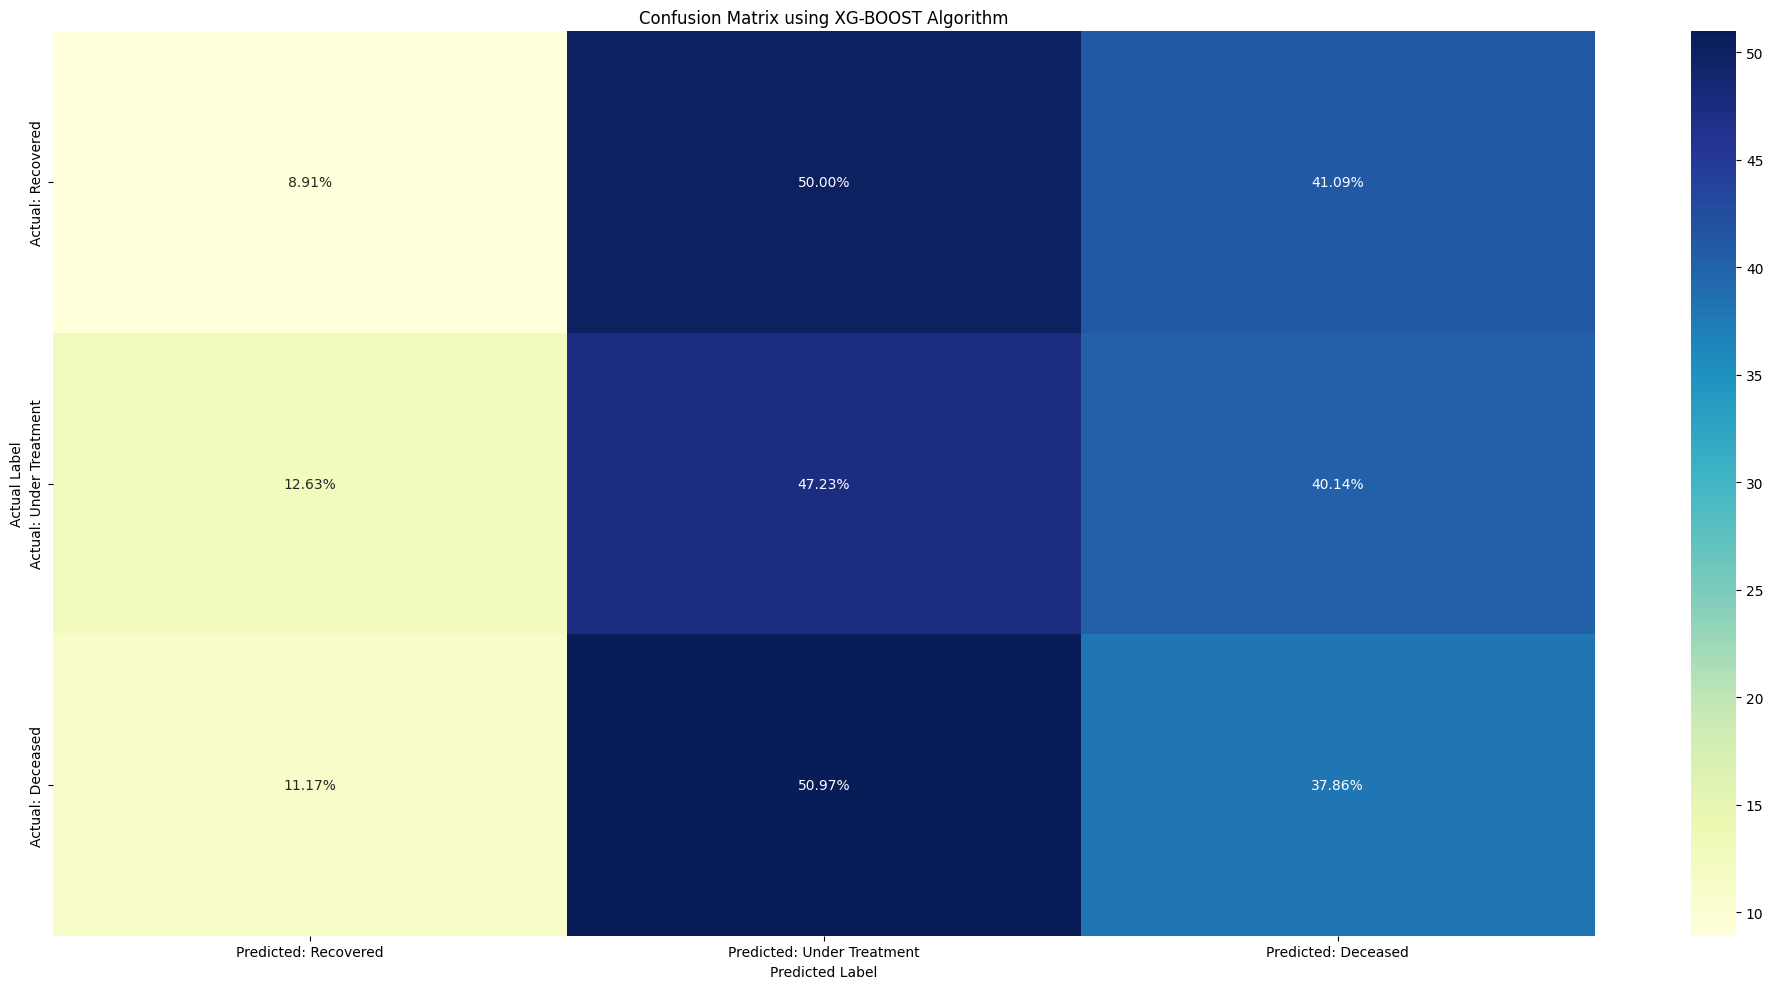

In [141]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: Recovered", "Predicted: Under Treatment", "Predicted: Deceased"],
            yticklabels=["Actual: Recovered", "Actual: Under Treatment", "Actual: Deceased"])
plt.title("Confusion Matrix using XG-BOOST Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

**RANDOM FOREST**

In [135]:
# Define Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
# Define Pipeline with SMOTE and RF
rf_pipeline = Pipeline([('smote', smote),
                        ('rf', rf_clf)
])
# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [100, 150, 200, 250],  # Number of trees
    'rf__max_depth': [3, 5, 8, 10, 15],  # Maximum depth of trees
    'rf__min_samples_split': [2, 5, 8, 10, 15],  # Minimum samples to split a node
}
# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(rf_pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 8, 10, 15],
                         'rf__min_samples_split': [2, 5, 8, 10, 15],
                         'rf__n_estimators': [100, 150, 200, 250]},
             scoring='accuracy', verbose=2)

In [136]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'rf__max_depth': 15, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [137]:
# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy of the RF model:", accuracy)

Test Accuracy of the RF model: 0.365


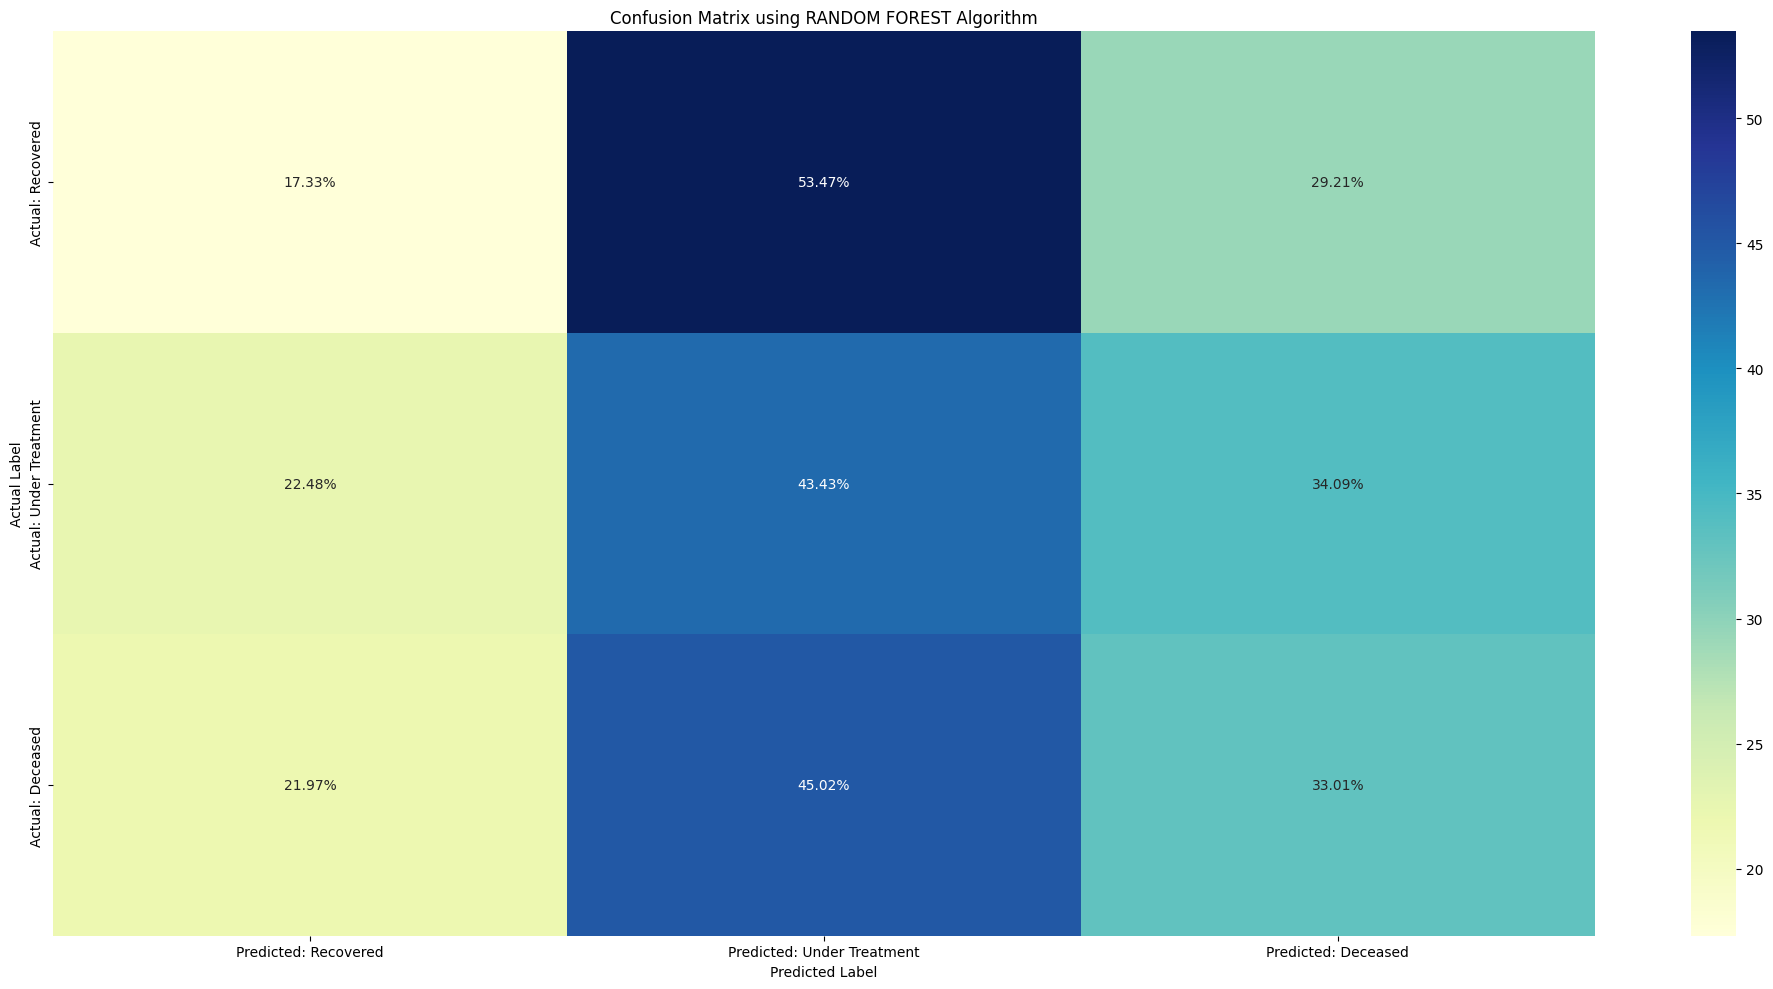

In [140]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: Recovered", "Predicted: Under Treatment", "Predicted: Deceased"],
            yticklabels=["Actual: Recovered", "Actual: Under Treatment", "Actual: Deceased"])
plt.title("Confusion Matrix using RANDOM FOREST Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [164]:
from sklearn.utils.class_weight import compute_class_weight

In [200]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Apply SMOTE to balance the classes in the training set
# Assuming y_train contains class labels like [0, 1, 2]
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_resampled),
                                     y=y_train_resampled)

# Convert to dictionary format Keras understands
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: 1.0, 1: 1.0, 2: 1.0}


In [201]:
ann = Sequential([
    Dense(128, activation='relu', input_dim=8),  # assuming 8 numerical features
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')  # 3 output classes
])

ann.compile(optimizer=Adam(learning_rate=0.1),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,531 (56.76 KB)

 Trainable params: 14,147 (55.26 KB)

 Non-trainable params: 384 (1.50 KB)

In [202]:
# Train the model
history = ann.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size = 64, validation_data=(X_test_scaled, y_test),  class_weight=class_weights_dict, verbose=1)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3374 - loss: 1.3070 - val_accuracy: 0.1120 - val_loss: 1.1412
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3434 - loss: 1.1028 - val_accuracy: 0.4870 - val_loss: 1.0673
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 1.1056 - val_accuracy: 0.4120 - val_loss: 1.0963
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.1045 - val_accuracy: 0.4120 - val_loss: 1.0732
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.1012 - val_accuracy: 0.4120 - val_loss: 1.1062
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 1.1020 - val_accuracy: 0.4870 - val_loss: 1.0259
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3273 - loss: 1.1042 - val_accuracy: 0.4870 - val_loss: 1.1126
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3226 - loss: 1.1033 - val_accuracy: 0

In [203]:
# Predict class probabilities
y_pred_probs = ann.predict(X_test_scaled)
# Take the class with the highest probability
y_pred_ann = np.argmax(y_pred_probs, axis=1)
# Evaluate accuracy
acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {acc_ann:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.4870


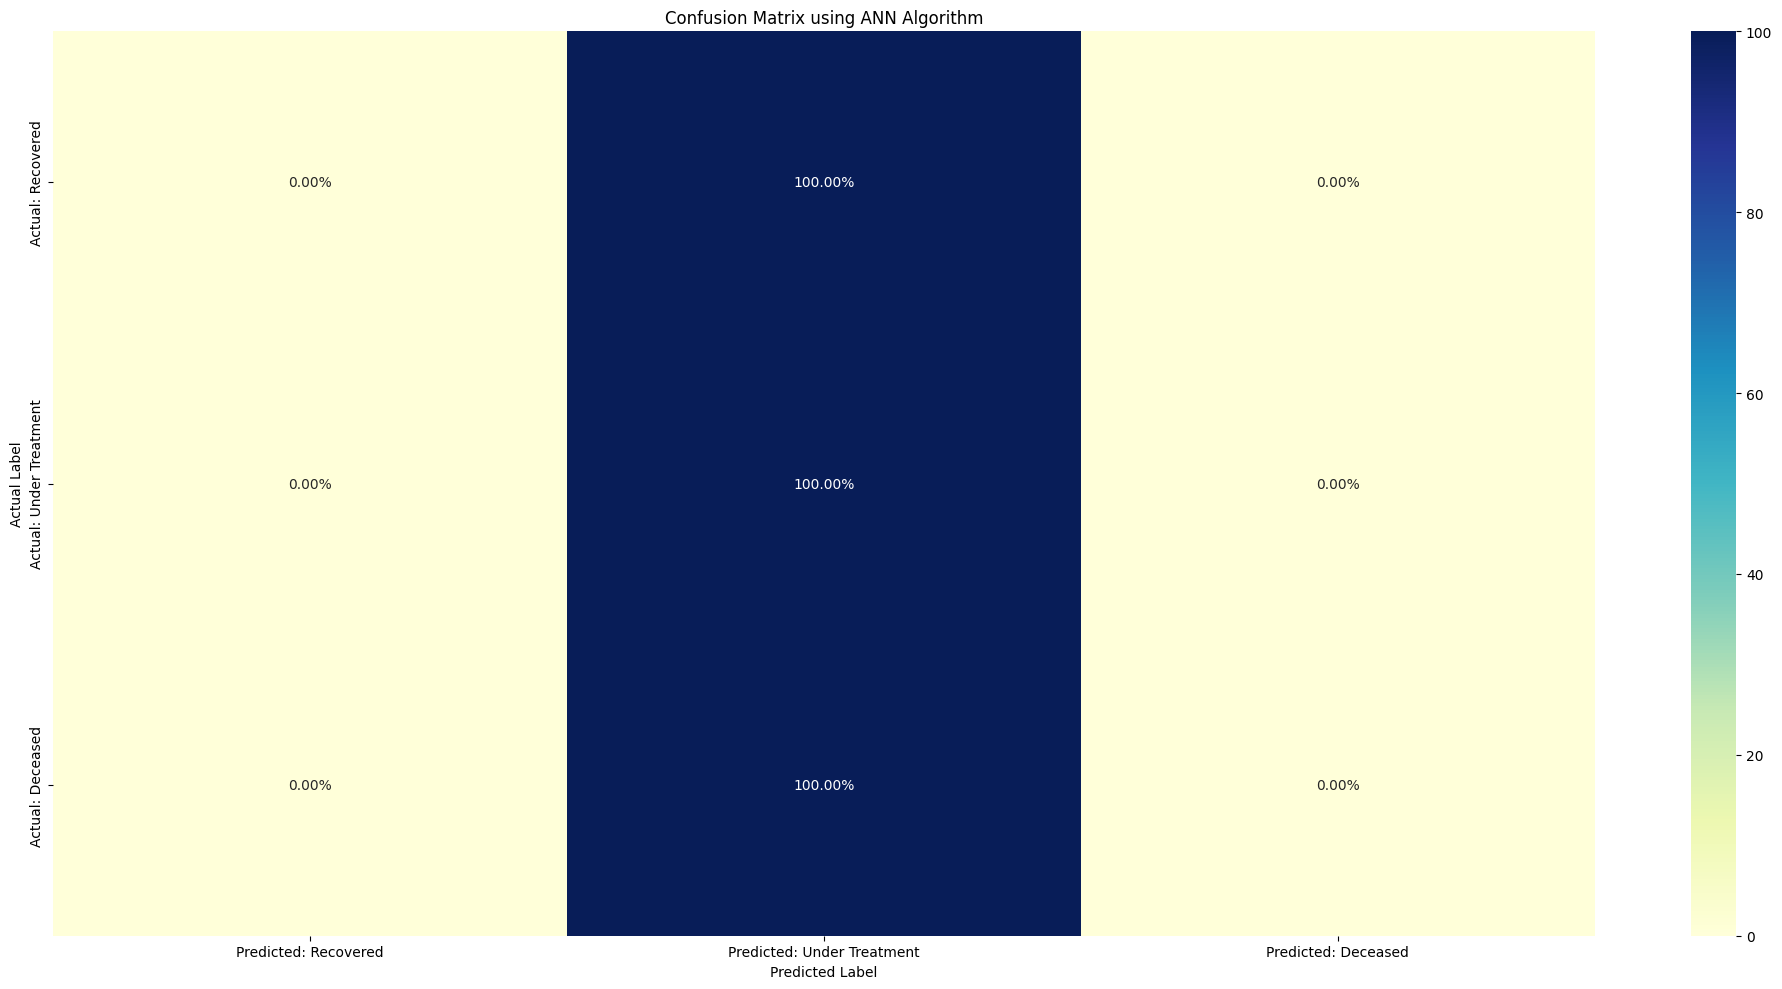

In [204]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: Recovered", "Predicted: Under Treatment", "Predicted: Deceased"],
            yticklabels=["Actual: Recovered", "Actual: Under Treatment", "Actual: Deceased"])
plt.title("Confusion Matrix using ANN Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

**RF+ANN**

In [208]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importance from the RF model
feature_importance = rf_model.feature_importances_

# Select top N important features (e.g., top 4)
top_n_features = 4  # Change this if you want more or fewer features
important_features = np.argsort(feature_importance)[::-1][:top_n_features]

# Select the top N features for both training and test sets
X_train_selected = X_train_resampled[:, important_features]  # Assumes X_train_resampled is a 2D numpy array
X_test_selected = X_test_scaled[:, important_features]  # Assumes X_test_scaled is a 2D numpy array

# Print the shapes to verify
print("Training data shape:", X_train_selected.shape)
print("Test data shape:", X_test_selected.shape)

# Build and train the ANN model using the selected features
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_selected.shape[1], activation='relu'))  # Ensure correct input_dim
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))  # 3 output neurons for 3 classes (modify based on your problem)
ann_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Use this for integer labels
                  metrics=['accuracy'])

# Print the model summary to confirm input/output shapes
ann_model.summary()

# Train the model
history = ann_model.fit(X_train_selected, y_train_resampled, epochs=50, batch_size=64, 
                        validation_data=(X_test_selected, y_test), verbose=1)

Training data shape: (11871, 4)
Test data shape: (2000, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3414 - loss: 1.1019 - val_accuracy: 0.3500 - val_loss: 1.0874
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 1.0949 - val_accuracy: 0.3020 - val_loss: 1.1003
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3776 - loss: 1.0921 - val_accuracy: 0.3690 - val_loss: 1.0893
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3710 - loss: 1.0906 - val_accuracy: 0.2800 - val_loss: 1.1061
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3755 - loss: 1.0902 - val_accuracy: 0.3185 - val_loss: 1.0930
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3825 - loss: 1.0858 - val_accuracy: 0.2740 - val_loss: 1.1110
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3863 - loss: 1.0854 - val_accuracy: 0.2535 - val_loss: 1.1184
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3758 - loss: 1.0856 - val_accuracy: 0.

In [212]:
# Predict class probabilities using the selected features
y_pred_probs = ann_model.predict(X_test_selected)  # Use X_test_selected with the same features as X_train_selected
# Take the class with the highest probability
y_pred_ann_rf = np.argmax(y_pred_probs, axis=1)
# Evaluate accuracy (assuming you have the correct true labels in y_test)
accuracy = np.mean(y_pred_ann_rf == y_test)
print(f'Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.332


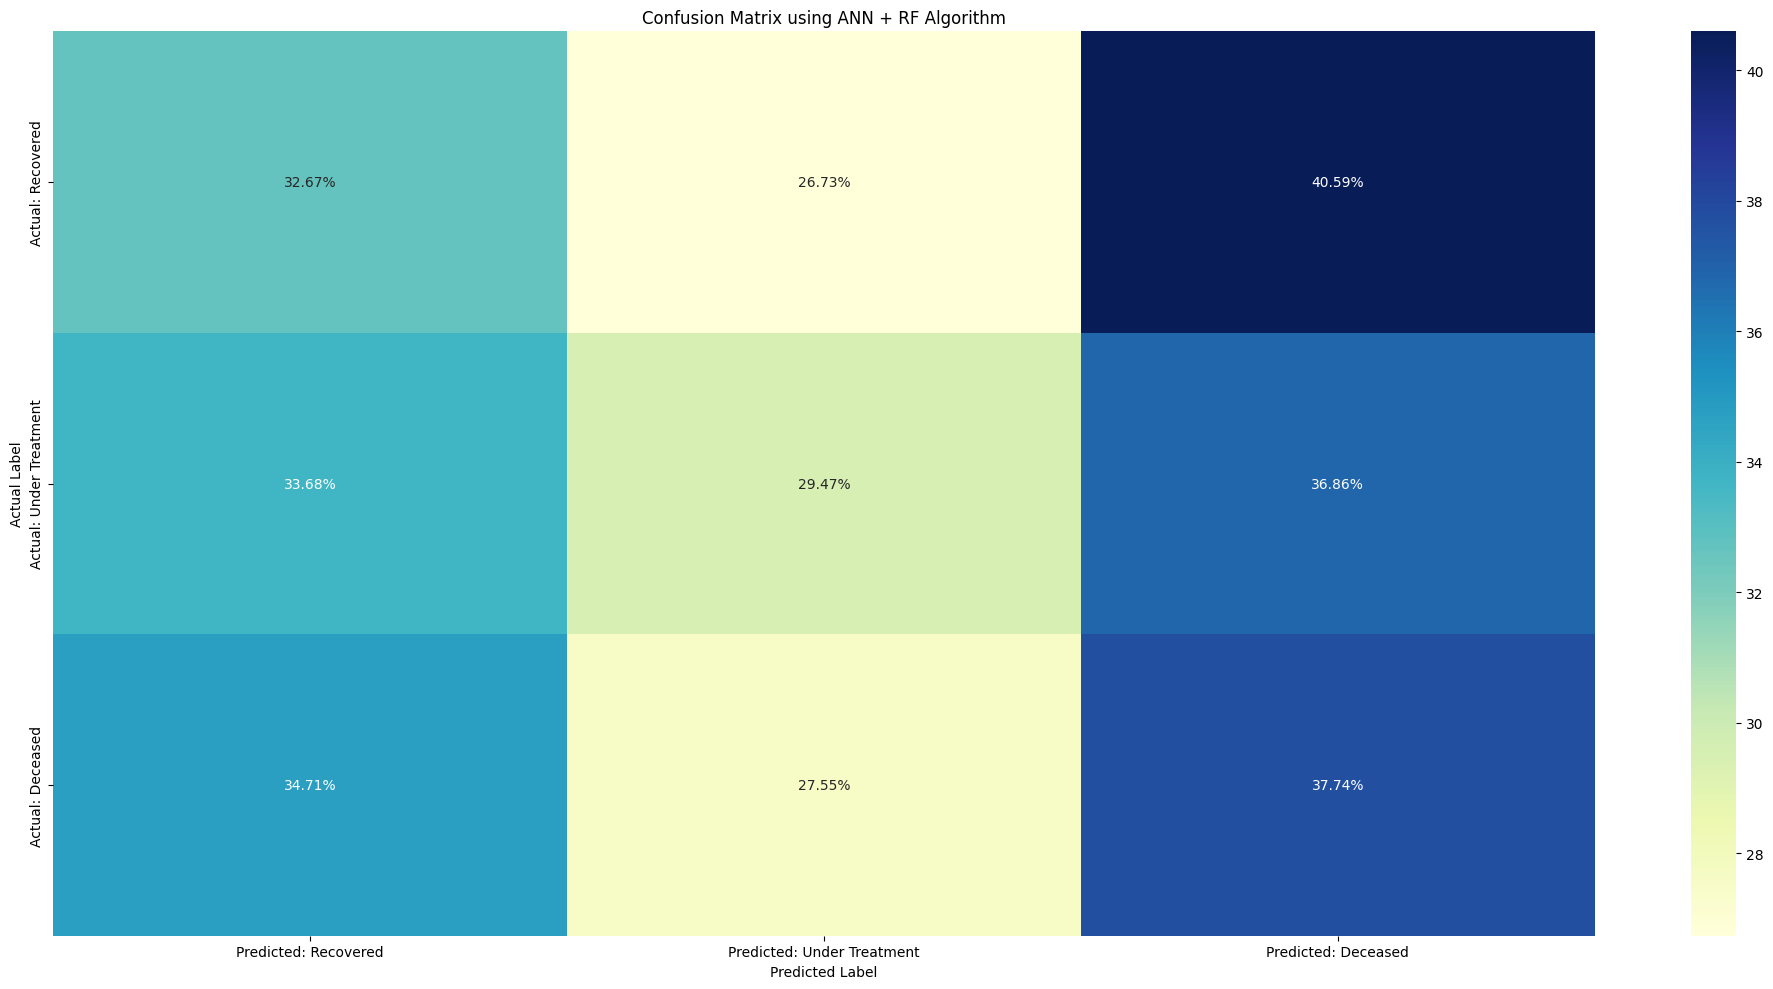

In [210]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_ann_rf)
# Row-wise percentage (normalize by actual class)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# Format each cell as a string with '%' symbol
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])
# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap="YlGnBu", cbar=True,
            xticklabels=["Predicted: Recovered", "Predicted: Under Treatment", "Predicted: Deceased"],
            yticklabels=["Actual: Recovered", "Actual: Under Treatment", "Actual: Deceased"])
plt.title("Confusion Matrix using ANN + RF Algorithm")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

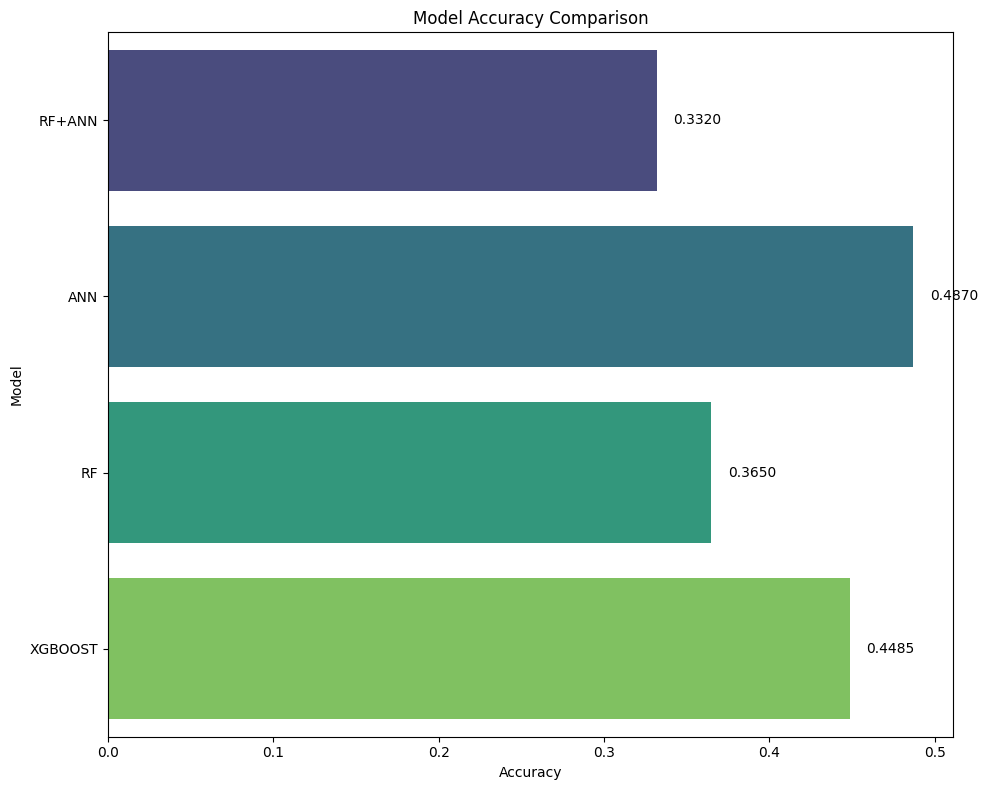

In [211]:
# Create a dictionary with model names and corresponding accuracy values
accuracy_dict = {
    'RF+ANN': accuracy_score(y_test, y_pred_ann_rf),
    'ANN': accuracy_score(y_test, y_pred_ann),
    'RF': accuracy_score(y_test, y_pred_rf),
    'XGBOOST': accuracy_score(y_test, y_pred_xg)
}
# Convert dictionary to DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
# Create a barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


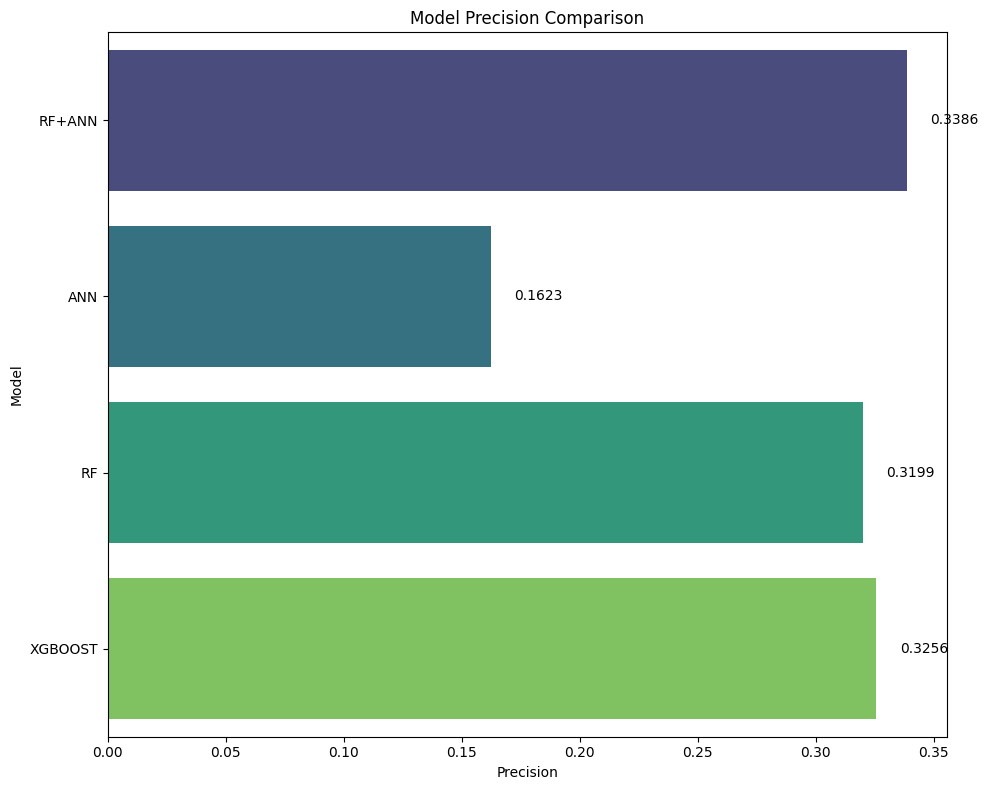

In [214]:
# Create a dictionary with model names and corresponding precision values
precision_dict = {
    'RF+ANN': precision_score(y_test, y_pred_ann_rf, average='macro'),
    'ANN': precision_score(y_test, y_pred_ann, average='macro'),
    'RF': precision_score(y_test, y_pred_rf, average='macro'),
    'XGBOOST': precision_score(y_test, y_pred_xg, average='macro')
}
# Convert dictionary to DataFrame for easy plotting
precision_df = pd.DataFrame(list(precision_dict.items()), columns=['Model', 'Precision'])
# Create a barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Precision', y='Model', data=precision_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(precision_df['Precision']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Precision')
plt.ylabel('Model')
plt.title('Model Precision Comparison')
# Show the plot
plt.tight_layout()
plt.show()

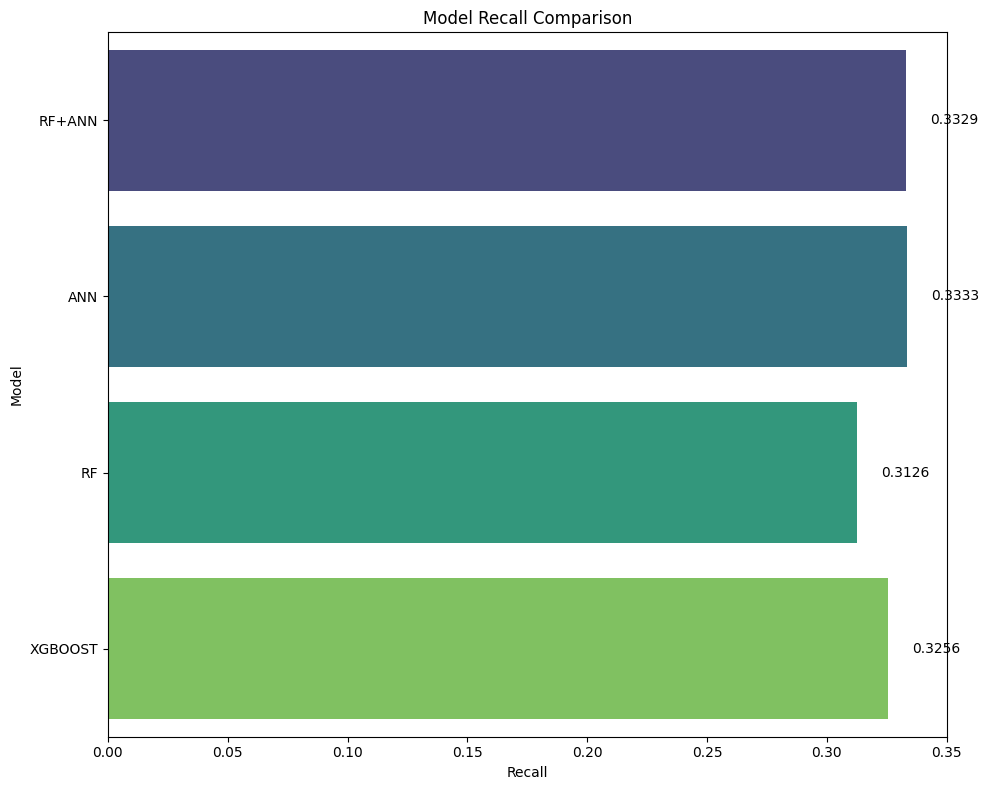

In [215]:
# Create a dictionary with model names and corresponding precision values
recall_dict = {
    'RF+ANN': recall_score(y_test, y_pred_ann_rf, average='macro'),
    'ANN': recall_score(y_test, y_pred_ann, average='macro'),
    'RF': recall_score(y_test, y_pred_rf, average='macro'),
    'XGBOOST': recall_score(y_test, y_pred_xg, average='macro')
}
# Convert dictionary to DataFrame for easy plotting
recall_df = pd.DataFrame(list(recall_dict.items()), columns=['Model', 'Recall'])
# Create a barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Recall', y='Model', data=recall_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(recall_df['Recall']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Model')
plt.title('Model Recall Comparison')
# Show the plot
plt.tight_layout()
plt.show()

In [216]:
from sklearn.metrics import cohen_kappa_score
# ANN+RF Kappa Calculation
kappa_ann_rf = cohen_kappa_score(y_test, y_pred_ann_rf)
# ANN Kappa Calculation
kappa_ann = cohen_kappa_score(y_test, y_pred_ann)
# XGBOOST Kappa Calculation
kappa_xg = cohen_kappa_score(y_test, y_pred_xg)
# Random Forest Kappa Calculation
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

# Display Kappa results
print(f"Kappa for ANN+RF: {kappa_ann_rf:.4f}")
print(f"Kappa for ANN: {kappa_ann:.4f}")
print(f"Kappa for XGBOOST: {kappa_xg:.4f}")
print(f"Kappa for RF: {kappa_rf:.4f}")
print(f"Kappa for ANN: {kappa_ann:.4f}")

Kappa for ANN+RF: 0.0066
Kappa for ANN: 0.0000
Kappa for XGBOOST: -0.0193
Kappa for RF: -0.0212
Kappa for ANN: 0.0000
